In [5]:
#IMPORTING LIBRARIES AND DEPENDENCIES:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,roc_auc_score
from fast_ml.model_development import train_valid_test_split
import math
from math import sqrt


In [3]:
# READING DATASET:
PATH = "./housing.csv"
cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]
df = pd.read_csv(PATH)
df = df[cols]
df.total_bedrooms = df.total_bedrooms.fillna(0)
df.median_house_value=np.log1p(df.median_house_value)
df=pd.get_dummies(df)
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target='median_house_value',train_size=0.6,valid_size=0.2,test_size=0.2, random_state=1)

In [51]:
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_valid)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

100%|██████████| 20/20 [01:13<00:00,  3.68s/it]


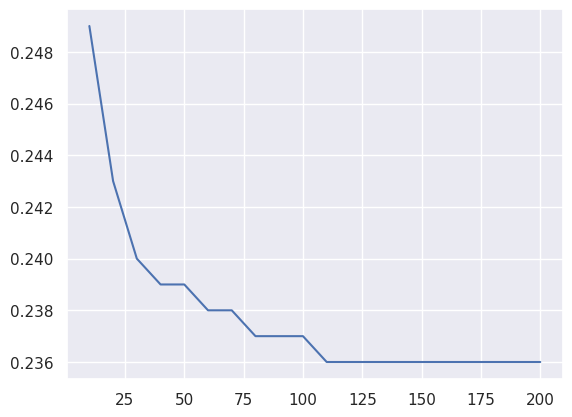

In [52]:
sns.set()
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

In [8]:
#Trying different tree depths

max_depth = [10, 15, 20, 25]
scores = []

for depth in max_depth:

    for n in tqdm(range(10, 201, 10)):
        
        rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_valid)
        score = np.sqrt(mean_squared_error(y_valid, y_pred))
     
    
        scores.append((depth, n, score))

df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators', 'rmse'])

    

100%|██████████| 20/20 [01:16<00:00,  3.84s/it]


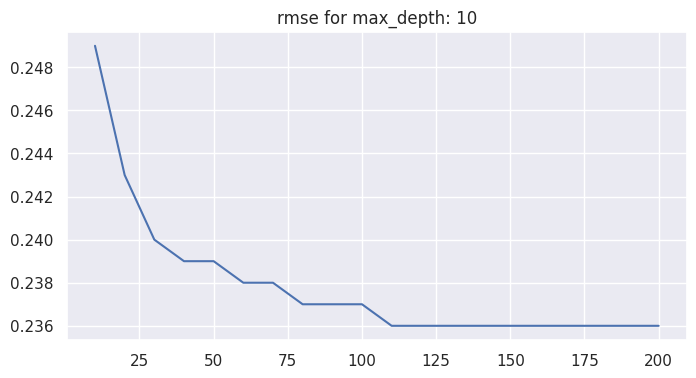

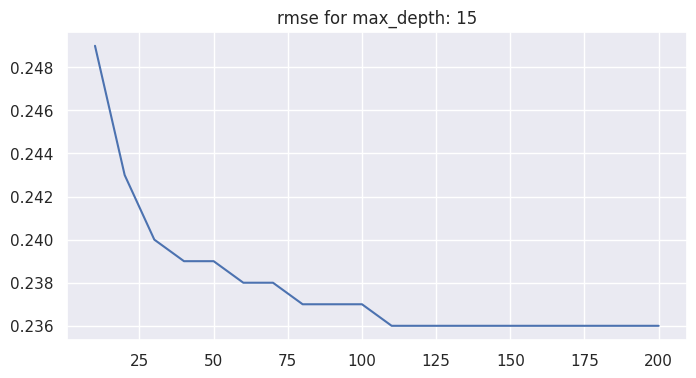

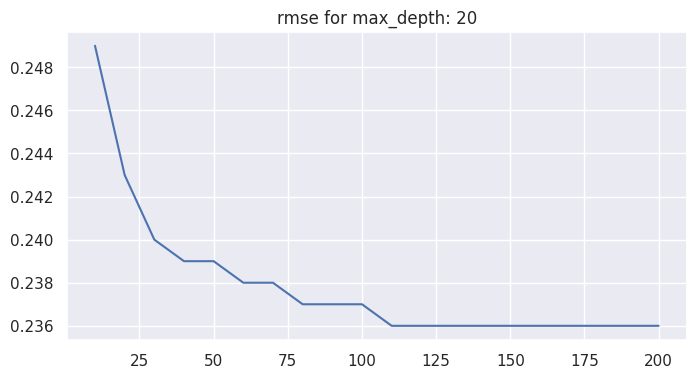

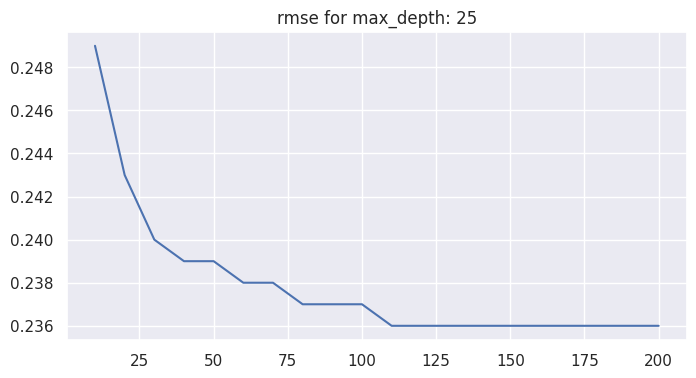

In [17]:
for depth in max_depth:
    sns.set()
    plt.figure(figsize=(8,4))
    plt.title(f'rmse for max_depth: {depth}')
    plt.plot(df_scores.query(f'max_depth == {depth}').n_estimators, df_scores.query(f'max_depth == {depth}').rmse.round(3))
    plt.show()

In [18]:
for depth in max_depth:
    print(f'minimum rmse for tree depth: {depth} -->' ,df_scores.query(f'max_depth =={depth}')['rmse'].min())

minimum rmse for tree depth: 10 --> 0.2356095502820276
minimum rmse for tree depth: 15 --> 0.23560955028202762
minimum rmse for tree depth: 20 --> 0.23560955028202765
minimum rmse for tree depth: 25 --> 0.23560955028202762


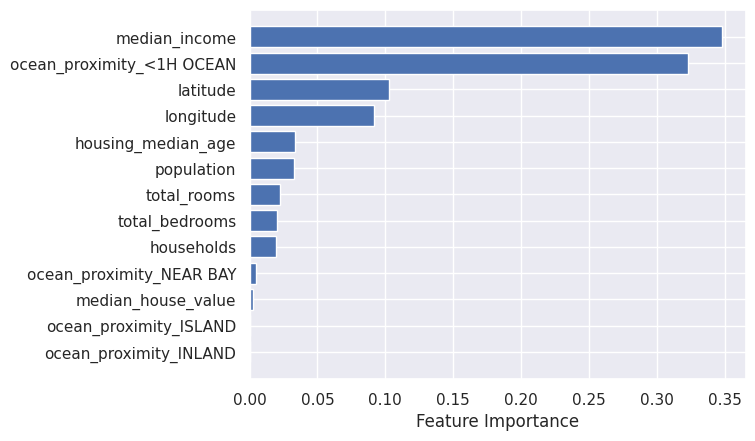

In [19]:
#feature importance

m=RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
m.fit(X_train,y_train)
sort = m.feature_importances_.argsort()
plt.barh(df.columns[sort], m.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()

In [ ]:
#XGboost Regressor now!

In [20]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [24]:
xgb_r=xgb.XGBRegressor(xgb_params)

In [28]:
X_train.rename(columns={'ocean_proximity_<1H OCEAN':'ocean_proximity_less_than_1H_OCEAN'}, inplace=True)

In [32]:
xgb_r.fit(X_train, y_train)

XGBoostError: [15:22:57] ../src/objective/objective.cc:26: Unknown objective function: `{'eta': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie

Stack trace:
  [bt] (0) /home/yastaha/.local/share/virtualenvs/hw#6-3Synnf3f/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x299dad) [0x7f36b7092dad]
  [bt] (1) /home/yastaha/.local/share/virtualenvs/hw#6-3Synnf3f/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x29a409) [0x7f36b7093409]
  [bt] (2) /home/yastaha/.local/share/virtualenvs/hw#6-3Synnf3f/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2230f2) [0x7f36b701c0f2]
  [bt] (3) /home/yastaha/.local/share/virtualenvs/hw#6-3Synnf3f/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x22af7d) [0x7f36b7023f7d]
  [bt] (4) /home/yastaha/.local/share/virtualenvs/hw#6-3Synnf3f/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2258c9) [0x7f36b701e8c9]
  [bt] (5) /home/yastaha/.local/share/virtualenvs/hw#6-3Synnf3f/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x68) [0x7f36b6eb8098]
  [bt] (6) /home/yastaha/anaconda3/lib/python3.9/lib-dynload/../../libffi.so.7(+0x69dd) [0x7f371014d9dd]
  [bt] (7) /home/yastaha/anaconda3/lib/python3.9/lib-dynload/../../libffi.so.7(+0x6067) [0x7f371014d067]
  [bt] (8) /home/yastaha/anaconda3/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x140f6) [0x7f37101670f6]

